### Figure 5. Multidimensional analysis capture potential adaptation mechanism of specific clade
- A. pan-genome structure comparison among human,dairy,bioethanol clade with wild type strains.
- B. Genomic divergence of human,diary and bioethanol with wild type
- C. Core metabolic network divergence of human,diary and bioethanol with wild type
- D. Evolutionary trend in genome and fluxes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats as stats

# set work directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# set figure parameters
# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

colors_set=sns.color_palette('Dark2')
colors_set

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

#### Figure 5A.pan-genome structure comparison among human,dairy,bioethanol clade with wild type strains.
(Draw in PPT)

##### Additional core genomes comparision

In [115]:
# load data
import json

with open('code/7.human_diary_ethanol_analysis/output/coregene_List.json','r') as f:
    coregeomes_dict=json.load(f)

coregenes_list=[set(list) for list in coregeomes_dict.values()]
name_list=list(coregeomes_dict.keys())

d:\softwares\programming\anoconda\envs\data\Lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((
C:\Users\wangh\AppData\Local\Temp\ipykernel_21144\676090426.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


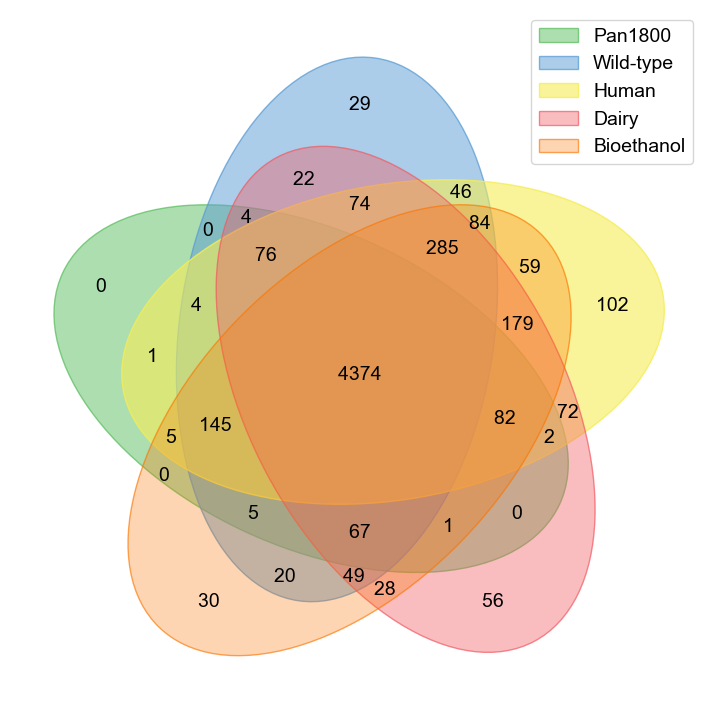

In [118]:
import venn
labels = venn.get_labels(coregenes_list, fill=['number', 
                                                                # 'logic',#开启每个组分代码
                                                                # 'percent'#每个组分的百分比
                                                               ],)

fig, ax = venn.venn5(labels, names=name_list)
# save result
fig.savefig('figures/output/additional5_coregenome_comparison.svg',dpi=400,bbox_inches='tight',transparent=True)
fig.show()

#### Figure 5B.Genomic divergence of human,diary and bioethanol with wild type

In [3]:
# load data
pca_accessory_geneMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_accessorygeneMatrix.csv',index_col=0)
pca_accessory_cnvMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_accessorycnvMatrix.csv',index_col=0)

# sort according to Type
pca_accessory_geneMatrix=pca_accessory_geneMatrix.sort_values(by='Type',ascending=False)
pca_accessory_cnvMatrix=pca_accessory_cnvMatrix.sort_values(by='Type',ascending=False)

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\2502077576.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_accessory_geneMatrix,ax=axes[0],palette=colors_set)
C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\2502077576.py:17: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_accessory_cnvMatrix,ax=axes[1],palette=colors_set)


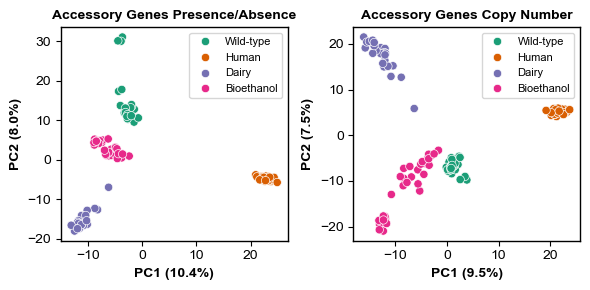

In [7]:
fig,axes=plt.subplots(1,2,figsize=(6,3))
# accessory geneMatrix PCA explained variance ratio:  [10.4, 8.0]
# accessory cnvMatrix PCA explained variance ratio:  [9.5, 7.5]
access_gene_exp_var=[10.4,8.0]
access_cnv_exp_var=[9.5,7.5]
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_accessory_geneMatrix,ax=axes[0],palette=colors_set)
axes[0].set_xlabel(f'PC1 ({access_gene_exp_var[0]}%)',fontdict=label_fontdict)
axes[0].set_ylabel(f'PC2 ({access_gene_exp_var[1]}%)',fontdict=label_fontdict)
axes[0].set_title('Accessory Genes Presence/Absence',fontdict=label_fontdict)
# remove legend title
axes[0].get_legend().set_title('')
# set legend loc
axes[0].legend(loc='upper right',fontsize=8)

# plot cnv pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_accessory_cnvMatrix,ax=axes[1],palette=colors_set)
axes[1].set_xlabel(f'PC1 ({access_cnv_exp_var[0]}%)',fontdict=label_fontdict)
axes[1].set_ylabel(f'PC2 ({access_cnv_exp_var[1]}%)',fontdict=label_fontdict)
axes[1].set_title('Accessory Genes Copy Number',fontdict=label_fontdict)
# remove legend title
axes[1].get_legend().set_title('')
# set legend loc,and 不设置边框,设置marker形状
axes[1].legend(loc='upper right',fontsize=8)

plt.tight_layout()
# save figure
fig.savefig('figures/output/figure5_accessory_pca_analysis.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

#### feature analysis

In [25]:
# load data
df_geneMatrix_feature=pd.read_csv('code/7.human_diary_ethanol_analysis/output/accessorygeneMatrix_feature_importance.csv',index_col=0)
df_cnvMatrix_feature=pd.read_csv('code/7.human_diary_ethanol_analysis/output/accessorycnvMatrix_feature_importance.csv',index_col=0)

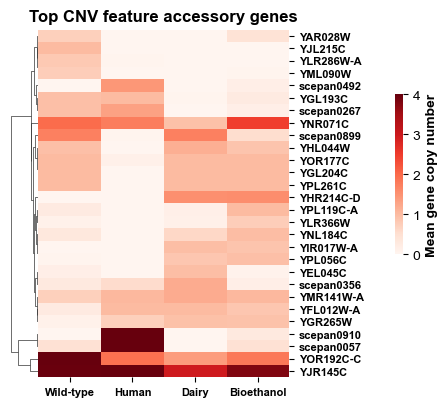

In [24]:
ax=sns.clustermap(data=df_cnvMatrix_feature,
               figsize=(4,4),
               vmin=0,
               vmax=4,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.1,0),
               col_cluster=False
               )
# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('Mean gene copy number',weight='bold')
# set location of colorbar
cbar.set_position([1, .4, .02, .4])
# set xticklabels
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(),fontdict=axis_fontdict)
# set yticklabels
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(),fontdict=axis_fontdict)
# set title
ax.ax_heatmap.set_title('Top CNV feature accessory genes',fontdict=title_fontdict)
# save result
# ax.savefig('figures/output/figure5_accessory_cnv_feature_importance.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

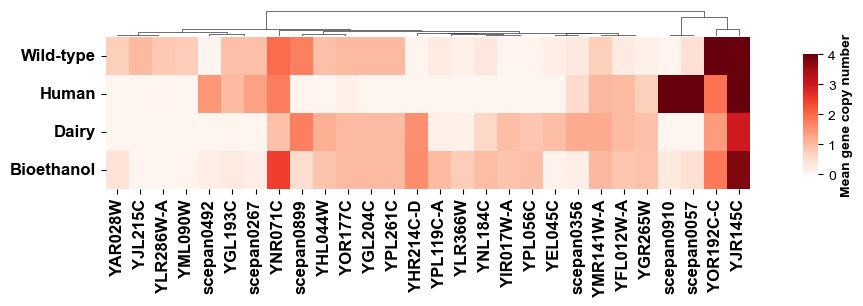

In [30]:
# convert df_cnvMatrix_feature and plot the heatmap
ax=sns.clustermap(data=df_cnvMatrix_feature.T,
               figsize=(7.5,3),
               vmin=0,
               vmax=4,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(0,.15),
               col_cluster=True,
               row_cluster=False)

# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('Mean gene copy number',weight='bold')
# set location of colorbar
cbar.set_position([.95, .4, .02, .4])
# set xticklabels
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(),fontsize=12,fontweight='bold')
# set title
# ax.ax_heatmap.set_title('Top CNV feature accessory genes',fontdict=title_fontdict)
# set y axis at the left
ax.ax_heatmap.yaxis.set_ticks_position('left')
# set y tick rotate and fontsize
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(),rotation=0,fontsize=12,fontweight='bold')
# save result
ax.savefig('figures/output/figure5_accessory_cnv_feature_importance.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

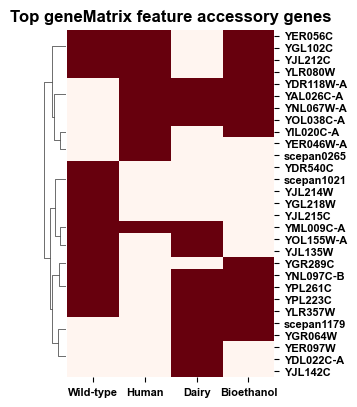

In [25]:
ax=sns.clustermap(data=df_geneMatrix_feature,
               figsize=(3.5,4),
               vmin=0,
               vmax=1,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.1,0),
               col_cluster=False
               )
# remove colorbar
plt.gcf().axes[-1].remove()
# set xticklabels
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(),fontdict=axis_fontdict)
# set yticklabels
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(),fontdict=axis_fontdict)
# set title
ax.ax_heatmap.set_title('Top geneMatrix feature accessory genes',fontdict=title_fontdict)
# save result
ax.savefig('figures/output/figure5_accessory_geneMatrix_feature_importance.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

### Additional figure. Pan-genome and core genome PCA analysis

In [22]:
# load data
pca_geneMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_geneMatrix.csv',index_col=0)
pca_cnvMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_cnvMatrix.csv',index_col=0)
pca_coregeneMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_coregeneMatrix.csv',index_col=0)
pca_corecnvMatrix=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_corecnvMatrix.csv',index_col=0)
pca_snp=pd.read_csv(r'code/SNP_analysis/output/SNPs_pca_output.csv',index_col=0)

# sort according to Type
pca_geneMatrix=pca_geneMatrix.sort_values(by='Type',ascending=False)
pca_cnvMatrix=pca_cnvMatrix.sort_values(by='Type',ascending=False)
pca_coregeneMatrix=pca_coregeneMatrix.sort_values(by='Type',ascending=False)
pca_corecnvMatrix=pca_corecnvMatrix.sort_values(by='Type',ascending=False)

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\1786377139.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_snp,ax=axes,palette=colors_set)


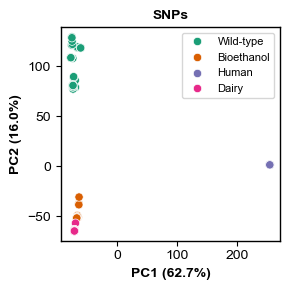

In [24]:
fig,axes=plt.subplots(1,1,figsize=(3,3))

pca_explained_ratio=[62.7,16.0]
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_snp,ax=axes,palette=colors_set)
axes.set_xlabel(f'PC1 ({pca_explained_ratio[0]}%)',fontdict=label_fontdict)
axes.set_ylabel(f'PC2 ({pca_explained_ratio[1]}%)',fontdict=label_fontdict)
axes.set_title('SNPs',fontdict=label_fontdict)
# set xlim
# axes.set_xlim(-40,80)
# set ylim
# axes.set_ylim(-30,40)
# remove legend title
axes.legend(loc='upper right',fontsize=8,title='')
plt.tight_layout()
# save figure
fig.savefig(r'figures/output/figure5_SNPs_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\1927595153.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_geneMatrix,ax=axes[0],palette=colors_set)
C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\1927595153.py:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_cnvMatrix,ax=axes[1],palette=colors_set)


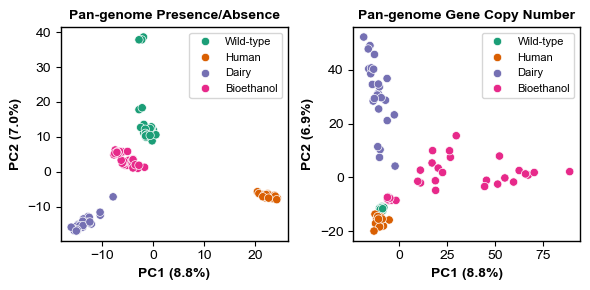

In [20]:
fig,axes=plt.subplots(1,2,figsize=(6,3))
# genome content presence/absence explained variance ratio:  [8.8, 7.0]
# copy number variation explained variance ratio:  [8.8, 6.9]
pan_gene_exp_var=[8.8,7.0]
pan_cnv_exp_var=[8.8,6.9]
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_geneMatrix,ax=axes[0],palette=colors_set)
axes[0].set_xlabel(f'PC1 ({pan_gene_exp_var[0]}%)',fontdict=label_fontdict)
axes[0].set_ylabel(f'PC2 ({pan_gene_exp_var[1]}%)',fontdict=label_fontdict)
axes[0].set_title('Pan-genome Presence/Absence',fontdict=label_fontdict)
# remove legend title
axes[0].legend(loc='upper right',fontsize=8,title='')

# plot cnv pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_cnvMatrix,ax=axes[1],palette=colors_set)
axes[1].set_xlabel(f'PC1 ({pan_cnv_exp_var[0]}%)',fontdict=label_fontdict)
axes[1].set_ylabel(f'PC2 ({pan_cnv_exp_var[1]}%)',fontdict=label_fontdict)
axes[1].set_title('Pan-genome Gene Copy Number',fontdict=label_fontdict)
# remove legend title
axes[1].legend(loc='upper right',fontsize=8,title='')

plt.tight_layout()
# save figure
# fig.savefig('figures/output/additional5_pangenome_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\4268760407.py:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_coregeneMatrix,ax=axes[0],palette=colors_set)
C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\4268760407.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_corecnvMatrix,ax=axes[1],palette=colors_set,alpha=0.8)


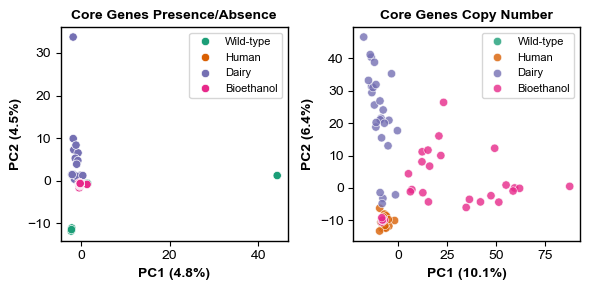

In [11]:
fig,axes=plt.subplots(1,2,figsize=(6,3))
# core geneMatrix PCA explained variance ratio:  [4.8, 4.5]
# core cnvMatrix PCA explained variance ratio:  [10.1, 6.4]
core_gene_exp_var=[4.8, 4.5]
core_cnv_exp_var=[10.1, 6.4]

# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_coregeneMatrix,ax=axes[0],palette=colors_set)
axes[0].set_xlabel(f'PC1 ({core_gene_exp_var[0]}%)',fontdict=label_fontdict)
axes[0].set_ylabel(f'PC2 ({core_gene_exp_var[1]}%)',fontdict=label_fontdict)
axes[0].set_title('Core Genes Presence/Absence',fontdict=label_fontdict)
# remove legend title
axes[0].legend(loc='upper right',fontsize=8,title='')

# plot cnv pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_corecnvMatrix,ax=axes[1],palette=colors_set,alpha=0.8)
axes[1].set_xlabel(f'PC1 ({core_cnv_exp_var[0]}%)',fontdict=label_fontdict)
axes[1].set_ylabel(f'PC2 ({core_cnv_exp_var[1]}%)',fontdict=label_fontdict)
axes[1].set_title('Core Genes Copy Number',fontdict=label_fontdict)
# remove legend title
axes[1].legend(loc='upper right',fontsize=8,title='')

plt.tight_layout()
# save figure
fig.savefig(r'figures/output/additional5_coregene_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

#### Figure 5C. Core metabolic network divergence of human,diary and bioethanol with wild type

In [14]:
# load data
pca_fluxes=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/pca_fluxes.csv',index_col=0)
# replave all Wildtype as Wild-type
pca_fluxes['Type']=pca_fluxes['Type'].replace('Wildtype','Wild-type')
# sort according to Type
pca_fluxes=pca_fluxes.sort_values(by='Type',ascending=False)
pca_fluxes.head()

,PC1,PC2,Type
105,22.570689,-5.912869,Wild-type
90,20.983132,-0.007919,Wild-type
79,-11.275220,-7.190242,Wild-type
78,8.191019,-3.398760,Wild-type
77,6.965762,-1.757529,Wild-type


C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\2472653231.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes,ax=axes,palette=colors_set)


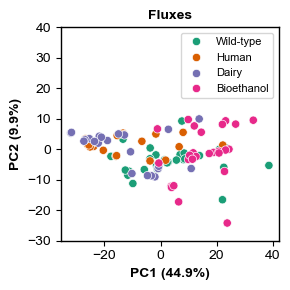

In [18]:
fig,axes=plt.subplots(1,1,figsize=(3,3))
# [44.9, 9.9]
flux_exp_var=[44.9, 9.9]
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes,ax=axes,palette=colors_set)
axes.set_xlabel(f'PC1 ({flux_exp_var[0]}%)',fontdict=label_fontdict)
axes.set_ylabel(f'PC2 ({flux_exp_var[1]}%)',fontdict=label_fontdict)
axes.set_title('Fluxes',fontdict=label_fontdict)
# set xlim
# axes.set_xlim(-40,80)
# set ylim
axes.set_ylim(-30,40)
# remove legend title
axes.legend(loc='upper right',fontsize=8,title='')
plt.tight_layout()
# save figure
fig.savefig(r'figures/output/addtional5_humandairyethanol_fluxes_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\410106883.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes[pca_fluxes['Type'].isin(['Wild-type','Human'])],ax=axes,palette=colors_set)


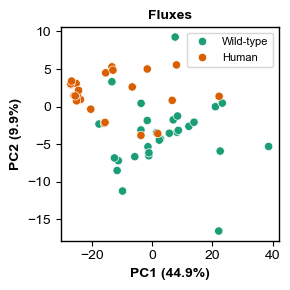

In [17]:
fig,axes=plt.subplots(1,1,figsize=(3,3))
# plot gene pca
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes[pca_fluxes['Type'].isin(['Wild-type','Human'])],ax=axes,palette=colors_set)
axes.set_xlabel(f'PC1 ({flux_exp_var[0]}%)',fontdict=label_fontdict)
axes.set_ylabel(f'PC2 ({flux_exp_var[1]}%)',fontdict=label_fontdict)
axes.set_title('Fluxes',fontdict=label_fontdict)
# remove legend title
axes.legend(loc='upper right',fontsize=8,title='')
plt.tight_layout()
# save figure
fig.savefig(r'figures/output/figure5_human_fluxes_pca.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

##### Random Forest classifier
- cross validation prediction accuracy:   
Human: mean score: 0.8545454545454545 std: 0.10909090909090907  
Dairy: mean score: 0.8254545454545456 std: 0.07614687851407972  
Bioethanol: mean score: 0.65 std: 0.097182531580755  

In [31]:
# load Random Forest feature importance
human_rf_feature=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/humandairyethanol_top_feature.xlsx',index_col=0,sheet_name='Human')
dairy_rf_feature=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/humandairyethanol_top_feature.xlsx',index_col=0,sheet_name='Dairy')
ethanol_rf_feature=pd.read_excel(r'code/7.human_diary_ethanol_analysis/output/humandairyethanol_top_feature.xlsx',index_col=0,sheet_name='Bioethanol')
human_rf_feature.head()

,importance,name
r_2045,0.034620,serine transport
r_0569,0.036483,inorganic diphosphatase
r_1596,0.039987,3-methyl-2-oxopentanoate transport
r_0514,0.043488,GMP synthase
r_3538,0.048795,"CTP transport, cytoplasm-ER membrane"


C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\287894851.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=human_rf_feature['name'][i]


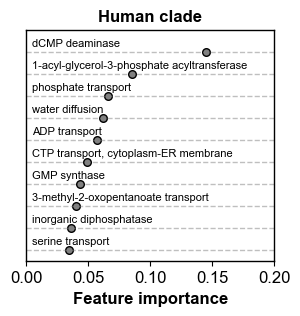

In [46]:
'''plot the top feature importance'''
# plot the scatter plot of feature importance
fig,ax=plt.subplots(figsize=(3.2,3))
# remove vertical gridlines
ax.xaxis.grid(False)
# set y grid as dashed
ax.yaxis.grid(True,linestyle='--')
# set the plot direction as horizontal,set the marker,set edge linewidth
sns.scatterplot(x=human_rf_feature['importance'],
            y=np.arange(human_rf_feature.shape[0]),
            ax=ax,
            markers='o',edgecolor='black',color='grey',linewidth=1,s=30)

ax.set_yticks([])
# set title
ax.set_title('Human clade',fontsize=12,fontdict=label_fontdict)
# set x label
ax.set_xlabel('Feature importance',fontsize=12,fontdict=label_fontdict)
# set x tick fontsize
ax.tick_params(axis='x',labelsize=12)
# plot dashed line plot 
for i in range(human_rf_feature.shape[0]):
    ax.plot([0,1],
            [i,i],
            '--',linewidth=1,color='grey',alpha=0.5)
# set x lim
ax.set_xlim(0,0.2)
ax.set_ylim(-0.5,10)
# text the rxn name
for i in range(human_rf_feature.shape[0]):
    rxnName=human_rf_feature['name'][i]
    if len(rxnName)>40:
        rxnName=rxnName.split('(')[0].strip()
    ax.text(x=0.005, 
            y=i+0.25, 
            s=rxnName,
            fontsize=8,color='black')
# save result
fig.savefig(r'figures/output/figure5_human_top_flux_feature.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\3973478524.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=dairy_rf_feature['name'][i]


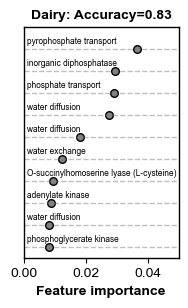

In [36]:
'''plot the top feature importance'''
# plot the scatter plot of feature importance
fig,ax=plt.subplots(figsize=(2,3))
# remove vertical gridlines
ax.xaxis.grid(False)
# set y grid as dashed
ax.yaxis.grid(True,linestyle='--')
# set the plot direction as horizontal,set the marker,set edge linewidth
sns.scatterplot(x=dairy_rf_feature['importance'],
            y=np.arange(dairy_rf_feature.shape[0]),
            ax=ax,
            markers='o',edgecolor='black',color='grey',linewidth=1,s=30)

ax.set_yticks([])
# set title
ax.set_title('Dairy: Accuracy=0.83',fontdict=label_fontdict)
# set x label
ax.set_xlabel('Feature importance',fontdict=label_fontdict)
# plot dashed line plot 
for i in range(dairy_rf_feature.shape[0]):
    ax.plot([0,1],
            [i,i],
            '--',linewidth=1,color='grey',alpha=0.5)
# set x lim
ax.set_xlim(0,0.05)
ax.set_ylim(-0.5,10)
# text the rxn name
for i in range(dairy_rf_feature.shape[0]):
    rxnName=dairy_rf_feature['name'][i]
    if len(rxnName)>40:
        rxnName=rxnName.split('(')[0].strip()
    ax.text(x=0.001, 
            y=i+0.25, 
            s=rxnName,
            fontsize=6,color='black')
# save result
# fig.savefig(r'figures/output/additional5_dairy_top_flux_feature.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\3102703247.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=ethanol_rf_feature['name'][i]


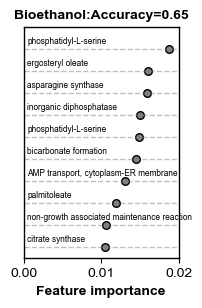

In [35]:
'''plot the top feature importance'''
# plot the scatter plot of feature importance
fig,ax=plt.subplots(figsize=(2,3))
# remove vertical gridlines
ax.xaxis.grid(False)
# set y grid as dashed
ax.yaxis.grid(True,linestyle='--')
# set the plot direction as horizontal,set the marker,set edge linewidth
sns.scatterplot(x=ethanol_rf_feature['importance'],
            y=np.arange(ethanol_rf_feature.shape[0]),
            ax=ax,
            markers='o',edgecolor='black',color='grey',linewidth=1,s=30)

ax.set_yticks([])
# set title
ax.set_title('Bioethanol:Accuracy=0.65',fontdict=label_fontdict)
# set x label
ax.set_xlabel('Feature importance',fontdict=label_fontdict)
# plot dashed line plot 
for i in range(ethanol_rf_feature.shape[0]):
    ax.plot([0,1],
            [i,i],
            '--',linewidth=1,color='grey',alpha=0.5)
# set x lim
ax.set_xlim(0,0.02)
ax.set_ylim(-0.5,10)
# text the rxn name
for i in range(ethanol_rf_feature.shape[0]):
    rxnName=ethanol_rf_feature['name'][i]
    if len(rxnName)>40:
        rxnName=rxnName.split('(')[0].strip()
    ax.text(x=0.0005, 
            y=i+0.25, 
            s=rxnName,
            fontsize=6,color='black')
# save result
# fig.savefig(r'figures/output/additional5_bioethanol_top_flux_feature.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

#### Additional. Compare growth of dairy,human,bioethanol and wildtype

In [33]:
# load data
df_growth=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_vs_experimental_growth_rate.csv',index_col=0)
df_growth['exp']=df_growth['exp'].astype(float)
# sort according to Type
df_growth=df_growth.sort_values(by='Type',ascending=False)

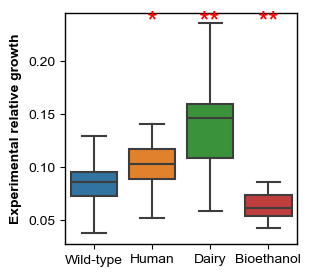

In [34]:
from scipy.stats import ttest_ind
p_dict={}
for i in df_growth['Type'].unique():
    p_dict[i]=ttest_ind(df_growth[df_growth['Type']==i]['exp'],df_growth[df_growth['Type']=='Wild-type']['exp'])[1]

fig,ax=plt.subplots(figsize=(3,3))
# plot the box plot, and not show outliers
sns.boxplot(x='Type',y='exp',data=df_growth,ax=ax,showfliers=False)
ax.set_xlabel('')
ax.set_ylabel('Experimental relative growth',fontdict=label_fontdict)
# add p value, if p<0.05, add '*' if p<0.01, add '**'
for i in range(len(df_growth['Type'].unique())):
    if p_dict[df_growth['Type'].unique()[i]]<0.01:
        ax.text(i-0.2,0.23,'**',fontsize=20,color='r')
    elif p_dict[df_growth['Type'].unique()[i]]<0.05:
        ax.text(i-0.1,0.23,'*',fontsize=20,color='r')
plt.show()
# save figure
fig.savefig(r'figures/output/additional5_clades_growth_comparison.svg',dpi=400,bbox_inches='tight',transparent=True)

#### additional 5. Evaluate model simulation result by RIPTIDE

In [31]:
# load data
df_growth=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_vs_experimental_growth_rate.csv',index_col=0)
df_ethanol=pd.read_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_ethanol_production.csv',index_col=0)

pearson correlation coefficient: 0.8453531268531161, p-value: 3.686059156106545e-28


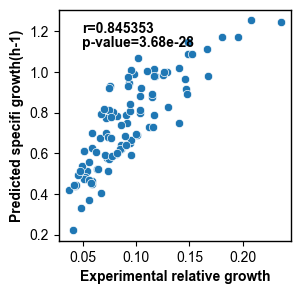

In [38]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
sns.scatterplot(x='exp',y='pre',data=df_growth,ax=ax)
plt.xlabel('Experimental relative growth',fontdict=label_fontdict)
plt.ylabel('Predicted specifi growth(h-1)',fontdict=label_fontdict)
# calculate the correlation coefficient
from scipy.stats import pearsonr
r,p=pearsonr(df_growth['exp'],df_growth['pre'])
plt.text(0.1,0.9,'r=%f' %r,transform=plt.gca().transAxes,fontdict=label_fontdict)
plt.text(0.1,0.84,'p-value=3.68e-28',transform=plt.gca().transAxes,fontdict=label_fontdict)
print(f"pearson correlation coefficient: {r}, p-value: {p}")
plt.show()
# save figure
fig.savefig(r'figures/output/additional5_growth_prediction.svg',dpi=400,bbox_inches='tight',transparent=True)

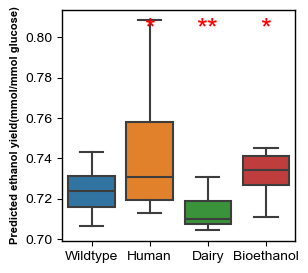

In [40]:
from scipy.stats import ttest_ind
p_dict={}
for i in df_ethanol['Type'].unique():
    p_dict[i]=ttest_ind(df_ethanol[df_ethanol['Type']==i]['Ethanol'],df_ethanol[df_ethanol['Type']=='Wildtype']['Ethanol'])[1]

fig,ax=plt.subplots(figsize=(3,3))
# plot the box plot, and not show outliers
sns.boxplot(x='Type',y='Ethanol',data=df_ethanol,ax=ax,showfliers=False)
ax.set_xlabel('')
ax.set_ylabel('Predicted ethanol yield(mmol/mmol glucose)',fontdict=axis_fontdict)
# add p value, if p<0.05, add '*' if p<0.01, add '**'
for i in range(len(df_ethanol['Type'].unique())):
    if p_dict[df_ethanol['Type'].unique()[i]]<0.01:
        ax.text(i-0.2,0.8,'**',fontsize=20,color='r')
    elif p_dict[df_ethanol['Type'].unique()[i]]<0.05:
        ax.text(i-0.1,0.8,'*',fontsize=20,color='r')
plt.show()
# save figure
fig.savefig(r'figures/output/additional5_clades_predicted_ethanol_comparison.svg',dpi=400,bbox_inches='tight',transparent=True)

### Figure 5D. Differential fluxes pathway entichment analysis

In [37]:
# load data
bioethanol_sig_up_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/bioethanol_flux_sig_up_enr.csv',index_col=0)
bioethanol_sig_dn_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/bioethanol_flux_sig_dn_enr.csv',index_col=0)
dairy_sig_dn_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/dairy_flux_sig_dn_enr.csv',index_col=0)
dairy_sig_up_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/dairy_flux_sig_up_enr.csv',index_col=0)
human_sig_up_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/human_flux_sig_up_enr.csv',index_col=0)
human_sig_dn_enr=pd.read_csv('code/7.human_diary_ethanol_analysis/output/human_flux_sig_dn_enr.csv',index_col=0)

In [38]:
human_sig_up_enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
7,CUSTOM140109035103936,Folate biosynthesis,9/15,8.471108e-08,6.776887e-07,9.394425,r_0350;r_0524;r_0344;r_0067;r_0066;r_1744;r_03...,16.284019,2.240116,9,0.600000
13,CUSTOM140109035103936,Growth,9/9,2.429555e-11,4.859110e-10,15.350093,r_4598;r_4049;r_4046;r_4050;r_4599;r_4041;r_40...,24.440728,2.731122,9,1.000000
20,CUSTOM140109035103936,Porphyrin and chlorophyll metabolism,10/17,2.009621e-08,2.009621e-07,9.226542,r_0436;r_0304;r_1083;r_0935;r_1081;r_0530;r_00...,17.722734,2.222084,10,0.588235
21,CUSTOM140109035103936,Purine metabolism,16/98,6.815442e-04,3.029085e-03,2.583155,r_0529;r_0855;r_0151;r_0911;r_0915;r_0148;r_04...,7.291149,0.949011,16,0.163265
22,CUSTOM140109035103936,Pyrimidine metabolism,10/66,1.156531e-02,3.304375e-02,2.399115,r_1045;r_1072;r_1704;r_1703;r_0214;r_0364;r_09...,4.459745,0.875100,10,0.151515
24,CUSTOM140109035103936,Riboflavin metabolism,9/16,1.823215e-07,1.215476e-06,8.822922,r_0440;r_0038;r_0967;r_0015;r_0965;r_0014;r_05...,15.517494,2.177353,9,0.562500
26,CUSTOM140109035103936,Starch and sucrose metabolism,4/20,4.086038e-02,1.089610e-01,3.299104,r_0195;r_1051;r_0006;r_0005,3.197594,1.193651,4,0.200000
27,CUSTOM140109035103936,Steroid biosynthesis,16/43,5.585024e-09,7.446698e-08,5.928991,r_0127;r_0235;r_0238;r_1012;r_0244;r_0237;r_02...,19.003177,1.779854,16,0.372093
28,CUSTOM140109035103936,Terpenoid backbone biosynthesis,8/35,1.769166e-03,6.433332e-03,3.638637,r_0462;r_0735;r_0355;r_0904;r_0560;r_0739;r_06...,6.337247,1.291609,8,0.228571
29,CUSTOM140109035103936,Thiamine metabolism,6/18,8.044059e-04,3.217623e-03,5.322035,r_1603;r_2069;r_0561;r_1036;r_0903;r_2071,7.125407,1.671856,6,0.333333


In [39]:
def enr_plot(enr_res,title,column='Adjusted P-value',threshold=0.05):

    enr_res[column].astype(float)
    # only keep the significant pathways(adj_pvalue<0.05)
    enr_res=enr_res[enr_res[column]<threshold]
    # sort the pathways by pvalue
    enr_res=enr_res.sort_values(by=column,ascending=False)
    
    fig,ax=plt.subplots(1,1,figsize=(4.8,4))
    if 'up' in title.lower():
        color='red'
    elif 'down' in title.lower():
        color='skyblue'

    y=enr_res['Term']
    x=-np.log10(enr_res[column])
    # set the bar width as 0.4
    ax.barh(y,x,color=color,height=0.4)
    ax.set_xlabel(f'-log10({column})',fontsize=11,fontdict=label_fontdict)
    ax.set_title(title,fontdict=title_fontdict)
    # set y ticks
    ax.set_yticklabels(y,fontsize=12)
    # set x ticks
    # ax.set
    plt.tight_layout()
    plt.show()
    return fig

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\1966809015.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontsize=12)


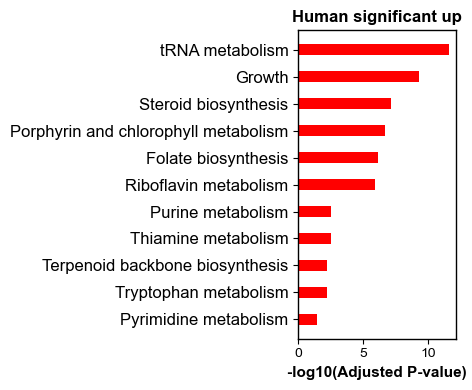

In [42]:
fig=enr_plot(human_sig_up_enr,title='Human significant up')
# save fig
fig.savefig(r'figures/output/figure5_human_sig_up_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_27208\1966809015.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontsize=12)


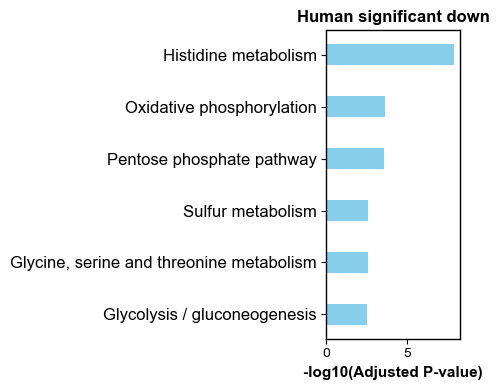

In [43]:
fig=enr_plot(human_sig_dn_enr,title='Human significant down')
# save fig
fig.savefig(r'figures/output/figure5_human_sig_dn_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_26944\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


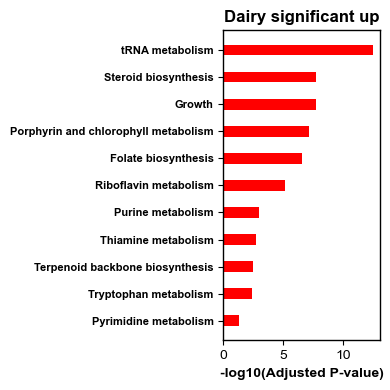

In [46]:
# for dairy
fig=enr_plot(dairy_sig_up_enr,title='Dairy significant up')
# save fig
fig.savefig(r'figures/output/figure5_dairy_sig_up_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_26944\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


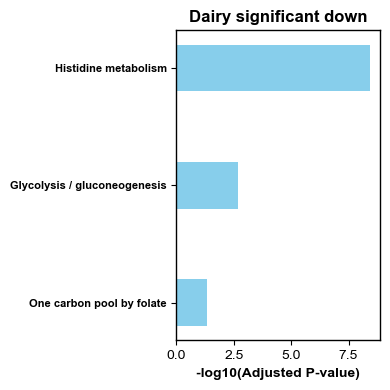

In [47]:
fig=enr_plot(dairy_sig_dn_enr,title='Dairy significant down')
# save fig
fig.savefig(r'figures/output/figure5_dairy_sig_dn_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_26944\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


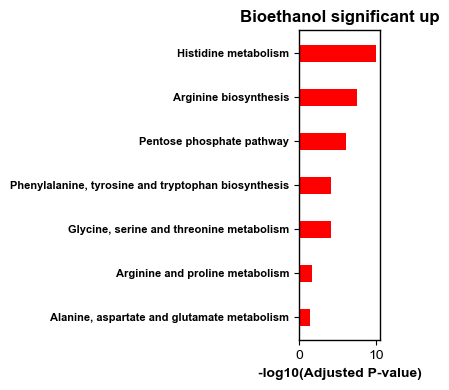

In [48]:
# for bioethanol
fig=enr_plot(bioethanol_sig_up_enr,title='Bioethanol significant up')
# save fig
fig.savefig(r'figures/output/figure5_bioethanol_sig_up_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_26944\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


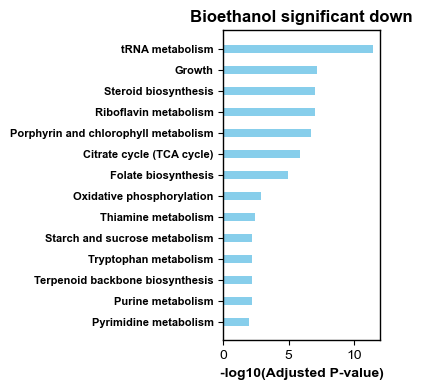

In [49]:
fig=enr_plot(bioethanol_sig_dn_enr,title='Bioethanol significant down')
# save fig
fig.savefig(r'figures/output/figure5_bioethanol_sig_dn_enr.svg',dpi=400,bbox_inches='tight',transparent=True)

### Additional. differential expression enrichment analysis

In [17]:
# load data
expresion_bioethanol_sig_up=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_bioethanol_sig_up_enr.csv',index_col=0)
expresion_bioethanol_sig_dn=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_bioethanol_sig_dn_enr.csv',index_col=0)
expresion_dairy_sig_up=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_dairy_sig_up_enr.csv',index_col=0)
expresion_dairy_sig_dn=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_dairy_sig_dn_enr.csv',index_col=0)
expresion_human_sig_up=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_human_sig_up_enr.csv',index_col=0)
expresion_human_sig_dn=pd.read_csv('code/7.human_diary_ethanol_analysis/output/expression_human_sig_dn_enr.csv',index_col=0)

C:\Users\wangh\AppData\Local\Temp\ipykernel_29404\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


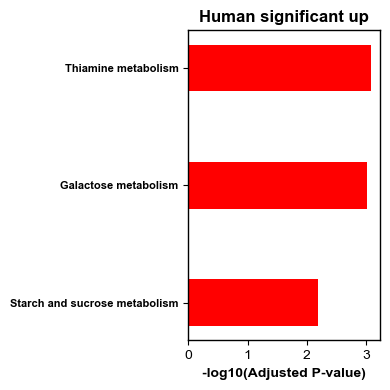

In [21]:
fig=enr_plot(expresion_human_sig_up,title='Human significant up')
# save fig
fig.savefig(r'figures/output/additional5_human_sig_up_expression.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_29404\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


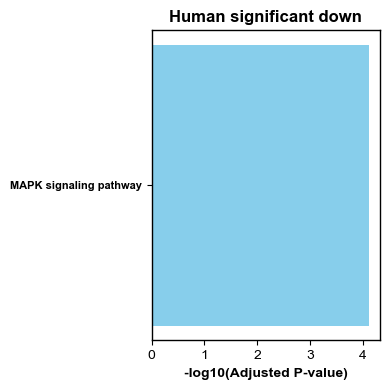

In [22]:
fig=enr_plot(expresion_human_sig_dn,title='Human significant down')
# save fig
fig.savefig(r'figures/output/additional5_human_sig_dn_expression.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_29404\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


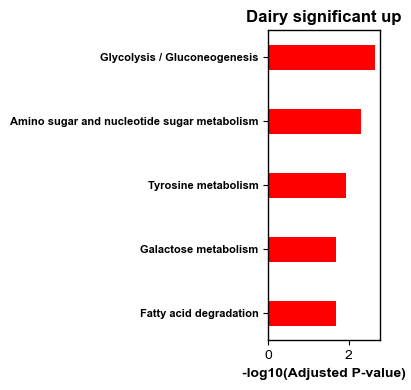

In [23]:
fig=enr_plot(expresion_dairy_sig_up,title='Dairy significant up')
# save fig
fig.savefig(r'figures/output/additional5_dairy_sig_up_expression.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_29404\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


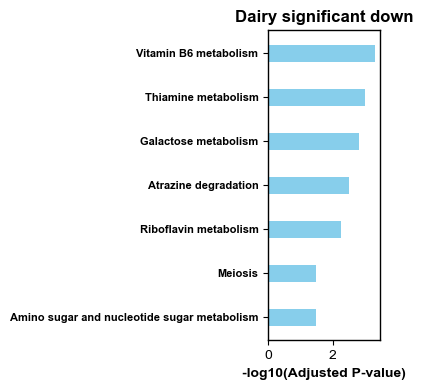

In [24]:
fig=enr_plot(expresion_dairy_sig_dn,title='Dairy significant down')
# save fig
fig.savefig(r'figures/output/additional5_dairy_sig_dn_expression.svg',dpi=400,bbox_inches='tight',transparent=True)

C:\Users\wangh\AppData\Local\Temp\ipykernel_29404\2139528369.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y,fontdict=axis_fontdict)


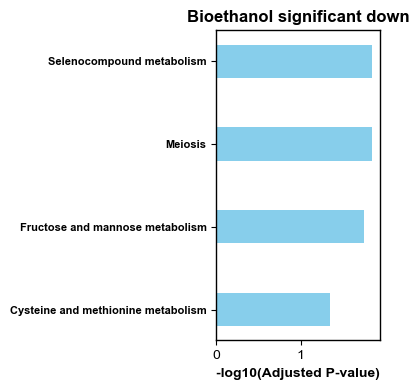

In [26]:
fig=enr_plot(expresion_bioethanol_sig_dn,title='Bioethanol significant down')
# save fig
fig.savefig(r'figures/output/additional5_bioethanol_sig_dn_expression.svg',dpi=400,bbox_inches='tight',transparent=True)

- plot the random forest model prediction accuracy

In [37]:
df_rf_accuracy=pd.read_csv('code/7.human_diary_ethanol_analysis/output/random_forest_accuracy.csv')
df_rf_accuracy

,accuracy,std,clade,data
0,0.96,0.067,Human,P/A
1,1.00,0.000,Human,CNV
2,0.85,0.110,Human,Fluxome
3,1.00,0.000,Dairy,P/A
4,1.00,0.000,Dairy,CNV
5,0.83,0.076,Dairy,Fluxome
6,0.98,0.033,Bioethanol,P/A
7,1.00,0.000,Bioethanol,CNV
8,0.65,0.097,Bioethanol,Fluxome


C:\Users\wangh\AppData\Local\Temp\ipykernel_35564\3081821974.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='clade',y='accuracy',hue='data',data=df_rf_accuracy,ax=ax,palette=colors_set)


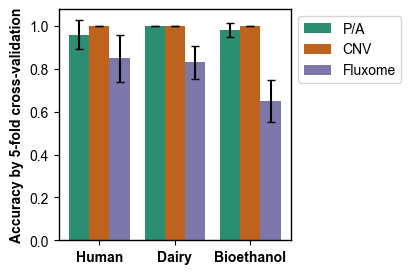

In [40]:
# plot bar plot of accuracy
fig,ax=plt.subplots(1,1,figsize=(3,3))
# plot barplot, and set the hue as data, set std as error bar
sns.barplot(x='clade',y='accuracy',hue='data',data=df_rf_accuracy,ax=ax,palette=colors_set)

df_group=df_rf_accuracy.groupby('clade')

clade_num=3
pos_bias=0.27
x_list=[]
for i in range(clade_num):
    x_list.append(i-pos_bias)
    x_list.append(i)
    x_list.append(i+pos_bias)

plt.errorbar(x=x_list,y=df_rf_accuracy['accuracy'],yerr=df_rf_accuracy['std'],fmt='none',color='black',capsize=3)
# set y label
plt.ylabel('Accuracy by 5-fold cross-validation',fontdict=label_fontdict)
# set x ticks
plt.xticks([0,1,2],['Human','Dairy','Bioethanol'],fontdict=label_fontdict)
# set x label
plt.xlabel('')
# set legend loc outside the plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.show()
# save figure
fig.savefig(r'figures/output/additional5_clades_randomforest_accuracy_comparison.svg',dpi=400,bbox_inches='tight',transparent=True)